# LSTM Autoencoder Architecture Visualization

This notebook provides various approaches to visualize the architecture of an autoencoder model, helping to better understand the model structure, data flow, and layer relationships.

In [8]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import dates as md
from IPython.display import Image, display

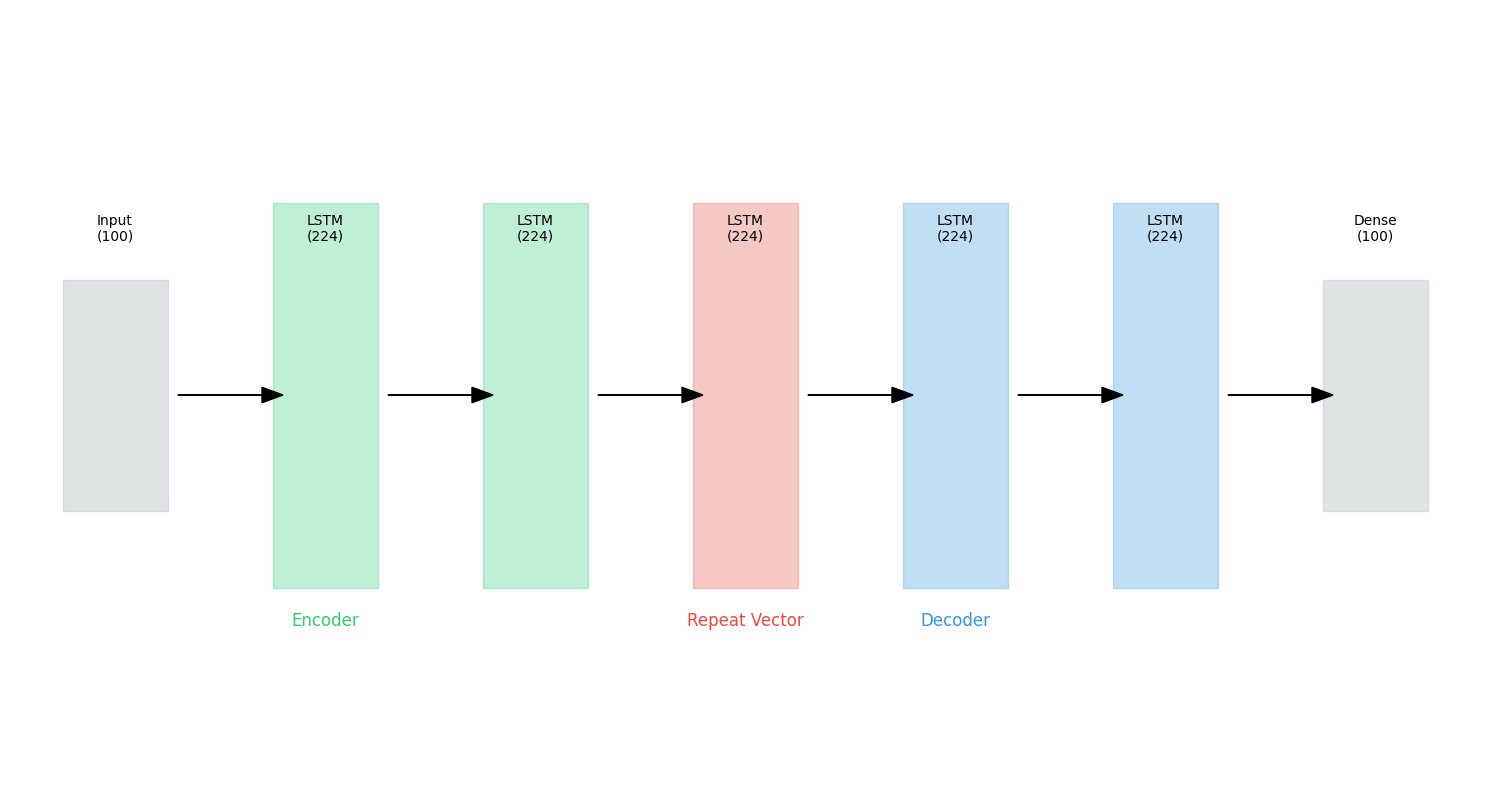

In [9]:
def draw_lstm_architecture():
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Define positions
    x_positions = [0, 2, 4, 6, 8, 10, 12]
    y_center = 5
    
    # Colors
    encoder_color = '#2ecc71'  # Green
    decoder_color = '#3498db'  # Blue
    bottleneck_color = '#e74c3c'  # Red
    io_color = '#95a5a6'  # Gray for input/output layers

    # Draw layers
    def draw_layer(x, text, color, is_io=False):
        if is_io:  # Changed is_input to is_io for both input and output
            width, height = 1, 3  # Smaller height for input/output
        else:
            width, height = 1, 5
        rect = plt.Rectangle((x - width/2, y_center - height/2), width, height,
                           facecolor=color, alpha=0.3, edgecolor=color)
        ax.add_patch(rect)
        plt.text(x, y_center + 2, text, ha='center', fontsize=10)
    
    # Input layer
    draw_layer(x_positions[0], f'Input\n(100)', io_color, is_io=True)
    
    # Encoder layers
    draw_layer(x_positions[1], 'LSTM\n(224)', encoder_color)
    draw_layer(x_positions[2], 'LSTM\n(224)', encoder_color)
    
    # Bottleneck layer
    draw_layer(x_positions[3], 'LSTM\n(224)', bottleneck_color)
    
    # Decoder layers
    draw_layer(x_positions[4], 'LSTM\n(224)', decoder_color)
    draw_layer(x_positions[5], 'LSTM\n(224)', decoder_color)
    
    # Output layer - now matches input layer style
    draw_layer(x_positions[6], f'Dense\n(100)', io_color, is_io=True)
    
    # Add arrows
    for i in range(len(x_positions)-1):
        plt.arrow(x_positions[i] + 0.6, y_center, 
                 x_positions[i+1] - x_positions[i] - 1.2, 0,
                 head_width=0.2, head_length=0.2, fc='k', ec='k')
    
    # Customize plot
    #plt.title('LSTM Autoencoder Architecture', pad=20, fontsize=14)
    plt.text(x_positions[1], y_center - 3, 'Encoder', ha='center', fontsize=12, color=encoder_color)
    plt.text(x_positions[3], y_center - 3, 'Repeat Vector', ha='center', fontsize=12, color=bottleneck_color)
    plt.text(x_positions[4], y_center - 3, 'Decoder', ha='center', fontsize=12, color=decoder_color)
    
    # Set limits and remove axes
    plt.xlim(-1, 13)
    plt.ylim(0, 10)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to create the visualization
draw_lstm_architecture()